# Cleaning Data and Visualization

This module marks a subtle change. Until now, you have been introduced to ideas and techniques that prepare you for real world situations. You are now going to start using these tools while learning how and when to use them in your work with data.

Before we get to the colorful world of graphing our data, we have to contend with the fact that real world data is messy. You will likely need to combine several data sources to get the data you want. The data from those sources will be incomplete. It will not likely be formatted in exactly the way you want to perform your analysis. It's for these reasons that most data scientists believe that about 80 percent of any project is spent getting the data into a form ready for analysis. Our graphs will only make sense after combing through our data and cleaning up the sore spots.

## Exploring `DataFrame` information

Once you have loaded your data into pandas, it will likely be in a `DataFrame`. However, if the dataset has 60,000 rows and 400 columns, how do you get a sense of what you're working with? Fortunately, pandas provides some convenient tools to provide a quick look at the overall information in a `DataFrame`.

To explore this functionality, you will import the Python `scikit-learn` library which contains example datasets for practice. We will use the "Iris plants" dataset which contains measurements performed on flowers belonging to the Iris species.

![](media/iris_organs.png)

In [64]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris['data'], columns=iris['feature_names'])

### `DataFrame.info`
Let's take a look at this dataset:

In [65]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


From this, you know that the *Iris* dataset has 150 entries across four columns. The data is stored as 64-bit floating-point numbers.

### `DataFrame.head` and `DataFrame.tail`
To get a quick snapshot of what the dataset looks like, you can check its first/last few rows using head()/tail() respectively:

In [66]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [67]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


### Exercise:

By default, `DataFrame.head` returns the first five rows of a `DataFrame`. In the code cell below, can you figure out how to get it to show more?

In [68]:
# Hint: Consult the documentation by using "iris_df.head?"

> **Takeaway:** The metadata in a DataFrame, or the first and last few values can get you an initial idea about the size, shape, and content of the data at hand.

## Dealing with missing data

> **Learning goal:** By the end of this subsection, you should know how to replace or remove null values from DataFrames.

Most of the time the datasets you want to use have missing values in them. How missing data is handled carries with it subtle tradeoffs that can affect your final analysis and real world outcomes.

Pandas handles missing values in two ways. The first is `NaN`, or **Not a Number**, which is used to indicate missing floating-point values. The second way of handling missing values is using the Python `None` keyword, which signals the lack of an object in general.

Here's a quick summary detailing the differences between `None` and `NaN`:

|   |`NaN` (NumPy.nan)|`None`|
|---|-----|------|
|dtype|'float'|General 'object'|
|Supports math?|Yes (any operation results in `NaN`)|No, not a numeric type|
|Supports aggregation?| Yes (results in `NaN`)|No, results in a crash|
|Upcasting?|casts any **numerical** array to a 'float' array|casts any array to an 'object' array|

**Note**: In other object-oriented programming languages (Java, C#/C++ etc), the `null` keyword is used instead to refer to the absence of an object. In the context of pandas/NumPy however, `null` encapsulates both cases of having either a `None` or a `NaN` as you will see in the following sections.

### Exercise:

In [69]:
# What happens if you add np.nan to an array of integers?
example3 = np.array([1, 2, 3])
example3.dtype

dtype('int32')

> **Remember**: `NaN` is for missing floating-point values; there is no `NaN` equivalent for integers, strings, or Booleans.

### `NaN` and `None`: null values in pandas

Even though `NaN` and `None` can behave somewhat differently, pandas is built to handle them interchangeably. To see this, consider a `Series` of integers:

In [70]:
int_series = pd.Series([1, 2, 3], dtype=int)
int_series

0    1
1    2
2    3
dtype: int32

### Exercise:

In [71]:
# Now set an element of int_series equal to None.
# How does that element show up in the series?
# What is the dtype of the series?


In the process of upcasting data types to establish data homogeneity in `Series` and `DataFrame`s, pandas will willingly switch missing values between `None` and `NaN`. Because of this design feature, it can be helpful to think of `None` and `NaN` as two flavors of "null" in pandas. Indeed, some of the core methods you will use to deal with missing values in pandas reflect this idea in their names:

- `isnull()`: Generates a Boolean mask indicating missing values
- `notnull()`: Complement of `isnull()`
- `dropna()`: Returns a filtered version of the data
- `fillna()`: Returns a copy of the data with missing values filled or imputed

These are important methods to master and get comfortable with, so let's go over them each in some depth.

### Detecting null values
Both `isnull()` and `notnull()` are your primary methods for detecting null data. Both return Boolean masks over your data.

In [72]:
example3 = pd.Series([0, np.nan, '', None, 'NaN'])
example3

0       0
1     NaN
2        
3    None
4     NaN
dtype: object

In [73]:
example3.isnull()

0    False
1     True
2    False
3     True
4    False
dtype: bool

Look closely at the output. Does any of it surprise you? While `0` is an arithmetic null, it's nevertheless a perfectly good integer and pandas treats it as such. `''` is a little more subtle. It is a string object and not a representation of null as far as pandas is concerned. `'NaN'` is also a string object that has no relation to the floating-point `NaN` value.

Now, let's turn this around and use these methods in a manner more like you will use them in practice. You can use Boolean masks directly as a ``Series`` or ``DataFrame`` index, which can be useful when working with isolated missing (or present) values.

In [74]:
# Try running example3[example3.notnull()].
# Before you do so, what do you expect to see?


**Key takeaway**: Both the `isnull()` and `notnull()` methods produce similar results when you use them in `DataFrame`s: they show the results and the index of those results, which will help you enormously as you wrestle with your data.

### Dropping null values

Beyond identifying missing values, pandas provides a convenient means to remove null values from `Series` and `DataFrame`s. Particularly on large datasets, it is often more advisable to remove missing [NA] values from your analysis than deal with them in other ways. To see this in action, return to `example3`:

In [75]:
example3 = example3.dropna()
example3

0      0
2       
4    NaN
dtype: object

Note that this should look like your output from `example3[example3.notnull()]`. The difference is that, rather than indexing on the masked values, `dropna` has removed those missing values from the `Series` `example3`.

Because `DataFrame`s have two dimensions, they afford more options for dropping data.

In [76]:
example4 = pd.DataFrame([[1,      np.nan, 7], 
                         [2,      5,      8], 
                         [np.nan, 6,      9]])
example4.dtypes

0    float64
1    float64
2      int64
dtype: object

(Did you notice that pandas upcast two of the columns to floats to accommodate the `NaN`s?)

You cannot drop a single value from a `DataFrame`, so you have to drop full rows or columns. In data science columns generally represent variables and rows represent observations, you are more likely to drop rows of data; the default setting for `dropna()` is to drop all rows that contain null values:

In [77]:
# By the way, dropna() does not directly modify example4 but rather returns a shallow copy
example4.dropna()

,0,1,2
1,2.0,5.0,8


If necessary, you can columns with NA values by assigning `'columns'` to the keyword argument `axis`:

In [78]:
example4.dropna(axis='columns')

,2
0,7
1,8
2,9


Notice that this can drop a lot of data that you might want to keep, particularly in smaller datasets. What if you only want to drop rows or columns that contain several or even all null values? You specify those settings in `dropna` with the `how` and `thresh` parameters. Check out what these parameters do by reading the documentation:

In [79]:
# Omit the parenthesis and add a question mark '?' to view info about a function
# If you get a warning about output size limit, just follow the link it gives you to get the full text
# Note that this only works on Jupyter Notebook code cells
example4.dropna?

Signature:
example4.dropna(
    axis: 'Axis' = 0,
    how: 'str' = 'any',
    thresh=None,
    subset=None,
    inplace: 'bool' = False,
)
Docstring:
Remove missing values.

See the :ref:`User Guide <missing_data>` for more on which values are
considered missing, and how to work with missing data.

Parameters
----------
axis : {0 or 'index', 1 or 'columns'}, default 0
    Determine if rows or columns which contain missing values are
    removed.

    * 0, or 'index' : Drop rows which contain missing values.
    * 1, or 'columns' : Drop columns which contain missing value.

    .. versionchanged:: 1.0.0

       Pass tuple or list to drop on multiple axes.
       Only a single axis is allowed.

how : {'any', 'all'}, default 'any'
    Determine if row or column is removed from DataFrame, when we have
    at least one NA or all NA.

    * 'any' : If any NA values are present, drop that row or column.
    * 'all' : If all values are NA, drop that row or column.

thresh : int, optional
    R

In [80]:
# Only drop columns that are composed entirely of nulls

example4[3] = np.nan
print("Before: ")
display(example4) #display() is just a nicer version of print() intended for Notebooks
print("After: ")
# Sometimes you will see 0 or 1 passed into the axis argument, 0 means rows and 1 means columns
example4.dropna(axis=1, how='all')

Before: 


,0,1,2,3
0,1.0,NaN,7,NaN
1,2.0,5.0,8,NaN
2,NaN,6.0,9,NaN


After: 


,0,1,2
0,1.0,NaN,7
1,2.0,5.0,8
2,NaN,6.0,9


The `thresh` parameter gives you finer-grained control: you set the number of *non-null* values that a row or column needs to have to be kept.

### Exercise:

In [81]:
# Consult the documentation for dropna(),
# Keep columns that have a minimum of 2 valid values, drop the rest
# Hint: You need to use the axis and thresh parameters

dirtyFrame = pd.DataFrame([['Title #0',      np.nan, 7], 
                         ['Title #1',      np.nan,      8], 
                         [None, 6,      9]])
display(dirtyFrame)
# Add your code after this comment!

,0,1,2
0,Title #0,NaN,7
1,Title #1,NaN,8
2,None,6.0,9


### Filling null values

Depending on your dataset, it can sometimes make more sense to fill null values with valid ones rather than drop them. Because this is such a common task in data science, pandas provides `fillna`, which returns a copy of the `Series` or `DataFrame` with the missing values replaced with one of your choosing. Let's create another example `Series` to see how this works in practice.

In [82]:
example5 = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
example5

a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64

You can fill the null entries with a single value, such as `0`:

In [83]:
example5.fillna(0)

a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64

You can **forward-fill** null values, which is to use the last valid value to fill a null:

In [84]:
example5.fillna(method='ffill')

a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64

You can also **back-fill** to propagate the next valid value backward to fill a null:

In [85]:
example5.fillna(method='bfill')

a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64

As you might guess, this works the same with `DataFrame`s, but you can also specify an `axis` along which to fill null values:

In [86]:
example4

,0,1,2,3
0,1.0,NaN,7,NaN
1,2.0,5.0,8,NaN
2,NaN,6.0,9,NaN


In [87]:
example4.fillna(method='ffill', axis='columns')

,0,1,2,3
0,1.0,1.0,7.0,7.0
1,2.0,5.0,8.0,8.0
2,NaN,6.0,9.0,9.0


Notice that when a previous value is not available for forward-filling, the null value remains.

When the `axis` parameter is specified as `'columns'`, `fillna()` checks the cells along a column for nulls. If it encounters a null it retrieves the previous value from the column that came before it.

You can be creative about how you use `fillna`. For example, let's look at `example4` again, but this time fill the missing values with the average of all the values in the `DataFrame`:

In [88]:
example4.fillna(example4.mean())

,0,1,2,3
0,1.0,5.5,7,NaN
1,2.0,5.0,8,NaN
2,1.5,6.0,9,NaN


Notice that column 3 is still valueless: the default direction is to fill values row-wise.

> **Takeaway:** There are multiple ways to deal with missing values in your datasets. The specific strategy you use (removing them, replacing them, or even how you replace them) should be dictated by the particulars of that data. You will develop a better sense of how to deal with missing values the more you handle and interact with datasets.

## Removing duplicate data

In addition to missing data, you will often encounter duplicated data in real world datasets. Fortunately, pandas provides an easy means of detecting and removing duplicate entries.

### Identifying duplicates: `duplicated`

You can easily spot duplicate values using the `duplicated` method in pandas, which returns a Boolean mask indicating whether an entry in a `DataFrame` is a duplicate of an earlier one. Let's create another example `DataFrame` to see this in action.

In [89]:
example6 = pd.DataFrame({'letters': ['A','B'] * 2 + ['B'],
                         'numbers': [1, 2, 1, 3, 3]})
example6

,letters,numbers
0,A,1
1,B,2
2,A,1
3,B,3
4,B,3


In [90]:
example6.duplicated()

0    False
1    False
2     True
3    False
4     True
dtype: bool

### Dropping duplicates: `drop_duplicates`
`drop_duplicates` simply returns a copy of the data for which all the `duplicated` values are `False`:

In [91]:
example6.drop_duplicates()

,letters,numbers
0,A,1
1,B,2
3,B,3


Both `duplicated` and `drop_duplicates` default to consider all columns but you can specify that they examine only a subset of columns in your `DataFrame`:

In [92]:
example6.drop_duplicates(['letters'])

,letters,numbers
0,A,1
1,B,2


## Combining datasets: merge and join

> **Learning goal:** By the end of this subsection, you should have a general knowledge of the various ways to combine `DataFrame`s.

Your most interesting analyses often comes from data melded together from more than one source. Pandas provides several methods of merging and joining datasets to make this necessary job easier:
 - **`pandas.merge`** connects rows in `DataFrame`s based on one or more keys.
 - **`pandas.concat`** concatenates or “stacks” together objects along an axis.
 - The **`combine_first`** instance method enables you to splice together overlapping data to fill in missing values in one object with values from another.

Let's examine merging data first, because it will be the most familiar to anyone already familiar with SQL or other relational databases.

### Categories of joins

`merge` carries out several types of joins: *one-to-one*, *many-to-one*, and *many-to-many*. You use the same basic function call to implement all of them and you will examine all three (because you will need all three at some point in your data-delving, depending on the data). You will start with one-to-one joins because they are generally the simplest.

#### One-to-one joins

Consider combining two `DataFrame`s that contain different information about the same employees in a company:

In [93]:
df1 = pd.DataFrame({'employee': ['Amin', 'Amel', 'Maissa', 'Yassine'],
                    'group': ['R&D', 'Marketing', 'Marketing', 'HR']})
df1

,employee,group
0,Amin,R&D
1,Amel,Marketing
2,Maissa,Marketing
3,Yassine,HR


In [94]:
df2 = pd.DataFrame({'employee': ['Amin', 'Amel', 'Maissa', 'Yassine'],
                    'hire_date': [2008, 2012, 2017, 2018]})
df2

,employee,hire_date
0,Amin,2008
1,Amel,2012
2,Maissa,2017
3,Yassine,2018


Combine this information into a single `DataFrame` using the `merge` function:

In [95]:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Amin,R&D,2008
1,Amel,Marketing,2012
2,Maissa,Marketing,2017
3,Yassine,HR,2018


Pandas joined on the `employee` column because it was the only column common to both `df1` and `df2` (note that the original indices of `df1` and `df2` were discarded by `merge`; this is generally the case with merges unless you conduct them by index, which you will learn later).

#### Many-to-one joins

A many-to-one join is like a one-to-one join except that one of the two key columns contains duplicate entries. The `DataFrame` resulting from such a join will preserve those duplicate entries as appropriate:

In [96]:
df4 = pd.DataFrame({'group': ['R&D', 'Marketing', 'HR'],
                    'supervisor': ['Dhia', 'Chiraz', 'Baha']})
df4

,group,supervisor
0,R&D,Dhia
1,Marketing,Chiraz
2,HR,Baha


In [97]:
pd.merge(df3, df4)

,employee,group,hire_date,supervisor
0,Amin,R&D,2008,Dhia
1,Amel,Marketing,2012,Chiraz
2,Maissa,Marketing,2017,Chiraz
3,Yassine,HR,2018,Baha


The resulting `DataFrame` has an additional column for `supervisor`; that column has an extra occurrence of 'Chiraz' that did not occur in `df4` because more than one employee in the merged `DataFrame` works in the 'Marketing' group.

Note that you didn’t specify which column to join. When you don't specify that information, `merge` uses the overlapping column names as the keys. However, that can be ambiguous; several columns might meet that condition. For that reason, it is a good practice to explicitly specify on which key to join. You can do this with the `on` parameter:

In [98]:
pd.merge(df3, df4, on='group')

,employee,group,hire_date,supervisor
0,Amin,R&D,2008,Dhia
1,Amel,Marketing,2012,Chiraz
2,Maissa,Marketing,2017,Chiraz
3,Yassine,HR,2018,Baha


#### Many-to-many joins
What happens if the key columns in both of the `DataFrame`s you are joining contain duplicates? That gives you a many-to-many join:

In [99]:
df5 = pd.DataFrame({'group': ['R&D', 'R&D',
                              'Marketing', 'Marketing', 'HR', 'HR'],
                    'core_skills': ['coding', 'soldering', 'writing', 'communication',
                               'spreadsheets', 'organization']})
df5

,group,core_skills
0,R&D,coding
1,R&D,soldering
2,Marketing,writing
3,Marketing,communication
4,HR,spreadsheets
5,HR,organization


In [100]:
pd.merge(df1, df5, on='group')

,employee,group,core_skills
0,Amin,R&D,coding
1,Amin,R&D,soldering
2,Amel,Marketing,writing
3,Amel,Marketing,communication
4,Maissa,Marketing,writing
5,Maissa,Marketing,communication
6,Yassine,HR,spreadsheets
7,Yassine,HR,organization


Again, to avoid ambiguity as to which column to join on, it is a good idea to explicitly tell `merge` which one to use with the `on` parameter.

#### `left_on` and `right_on` keywords
What if you need to merge two datasets with no shared column names? For example, what if you are using a dataset in which the employee name is labeled as 'name' rather than 'employee'? In such cases, you will use the `left_on` and `right_on` keywords to specify the column names on which to join:

In [101]:
df6 = pd.DataFrame({'name': ['Amin', 'Amel', 'Maissa', 'Yassine'],
                    'salary': [70000, 80000, 120000, 90000]})
df6

,name,salary
0,Amin,70000
1,Amel,80000
2,Maissa,120000
3,Yassine,90000


In [102]:
group_salary = pd.merge(df1, df6, left_on="employee", right_on="name")
group_salary

,employee,group,name,salary
0,Amin,R&D,Amin,70000
1,Amel,Marketing,Amel,80000
2,Maissa,Marketing,Maissa,120000
3,Yassine,HR,Yassine,90000


### Exercise:

In [103]:
# Using the documentation, can you figure out how to use .drop() to get rid of the 'name' column?
# Hint: You will need to supply two parameters to .drop().
group_salary.drop?

Signature:
group_salary.drop(
    labels=None,
    axis: 'Axis' = 0,
    index=None,
    columns=None,
    level: 'Level | None' = None,
    inplace: 'bool' = False,
    errors: 'str' = 'raise',
)
Docstring:
Drop specified labels from rows or columns.

Remove rows or columns by specifying label names and corresponding
axis, or by specifying directly index or column names. When using a
multi-index, labels on different levels can be removed by specifying
the level. See the `user guide <advanced.shown_levels>`
for more information about the now unused levels.

Parameters
----------
labels : single label or list-like
    Index or column labels to drop.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Whether to drop labels from the index (0 or 'index') or
    columns (1 or 'columns').
index : single label or list-like
    Alternative to specifying axis (``labels, axis=0``
    is equivalent to ``index=labels``).
columns : single label or list-like
    Alternative to specifying axis (``l

You can also use the `join` method for `DataFrame`s, which merges on indices by default. To use a different column as an index for a `DataFrame`, you can use `set_index()`:

In [104]:
df1a = df1.set_index('employee')
display(df1a)
df2a = df2.set_index('employee')
display(df2a)

df1a.join(df2a)

,group
employee,
Amin,R&D
Amel,Marketing
Maissa,Marketing
Yassine,HR


,hire_date
employee,
Amin,2008
Amel,2012
Maissa,2017
Yassine,2018


,group,hire_date
employee,,
Amin,R&D,2008
Amel,Marketing,2012
Maissa,Marketing,2017
Yassine,HR,2018


You can also mix and match `left_index`/`right_index` with `right_on`/`left_on`:

#### Set arithmetic for joins

Let's return to many-to-many joins for a moment. A consideration that is unique to them is the *arithmetic* of the join--specifically, the set arithmetic you use for the join. To illustrate what this, let's restructure an old example `DataFrame`:

In [105]:
df5 = pd.DataFrame({'group': ['Engineering', 'Marketing', 'Sales'],
                    'core_skills': ['math', 'writing', 'communication']})
df5

,group,core_skills
0,Engineering,math
1,Marketing,writing
2,Sales,communication


In [106]:
pd.merge(df1, df5, on='group')

,employee,group,core_skills
0,Amel,Marketing,writing
1,Maissa,Marketing,writing


Notice that after you have restructured `df5` and then re-run the merge with `df1`, you have only two entries in the result. This is because you merged on `group` and 'Marketing' was the only entry that appeared in the `group` column of both `DataFrame`s.

In effect, what you have gotten is the *intersection* of both `DataFrame`s. This is known as the inner join in the database world and it is the default setting for `merge`, although you can certainly specify it:

In [107]:
pd.merge(df1, df5, on='group', how='inner')

,employee,group,core_skills
0,Amel,Marketing,writing
1,Maissa,Marketing,writing


The complement of the inner join is the outer join, which returns the *union* of the two `DataFrame`s.

### Exercise:

In [108]:
# The keyword for performing an outer join is how='outer'. How would you code it?
# What do you expect the output of an outer join of df1 and df5 to be?


Notice in your resulting `DataFrame` that not every row in `df1` and `df5` had a value that corresponds to the union of the key values (the 'group' column). Pandas fills in these missing values with `NaN`s.

Inner and outer joins are not your only options. A *left join* returns all the rows in the first (left-side) `DataFrame` supplied to `merge` along with rows from the other `DataFrame` that match the left-side key values (and `NaNs` rows with respective values):

In [109]:
pd.merge(df1, df5, how='left')

,employee,group,core_skills
0,Amin,R&D,NaN
1,Amel,Marketing,writing
2,Maissa,Marketing,writing
3,Yassine,HR,NaN


### Exercise:

In [110]:
# Now run the right merge between df1 and df5.
# What do you expect to see?


#### `suffixes` keyword: dealing with conflicting column names
Because you can join datasets, you will eventually join two with conflicting column names. Let's look at another example to see what this means:

In [111]:
df7 = pd.DataFrame({'name': ['Gary', 'Stu', 'Mary', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df7

,name,rank
0,Gary,1
1,Stu,2
2,Mary,3
3,Sue,4


In [112]:
df8 = pd.DataFrame({'name': ['Gary', 'Stu', 'Mary', 'Sue'],
                    'rank': [3, 1, 4, 2]})
df8

,name,rank
0,Gary,3
1,Stu,1
2,Mary,4
3,Sue,2


In [113]:
pd.merge(df7, df8, on='name')

,name,rank_x,rank_y
0,Gary,1,3
1,Stu,2,1
2,Mary,3,4
3,Sue,4,2


Each column name in a `DataFrame` must be unique, so in cases where two joined `DataFrame`s share column names (aside from the column serving as the key), the `merge` function automatically appends the suffix `_x` or `_y` to the conflicting column names to make them unique. In cases where it is best to control your column names, you can specify a custom suffix for `merge` to append through the `suffixes` keyword:

In [114]:
pd.merge(df7, df8, on='name', suffixes=['_left', '_right'])

,name,rank_left,rank_right
0,Gary,1,3
1,Stu,2,1
2,Mary,3,4
3,Sue,4,2


Note that these suffixes work if there are multiple conflicting columns.

### Concatenation in NumPy
Concatenation in pandas is built off of the concatenation functionality for NumPy arrays. Here is what NumPy concatenation looks like:
 - For one-dimensional arrays:

In [115]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

 - For two-dimensional arrays:

In [116]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

Notice that the `axis=1` parameter makes the concatenation occur along columns rather than rows. Concatenation in pandas looks similar to this.

### Concatenation in pandas

Pandas has a function, `pd.concat()`, that can be used for a simple concatenation of `Series` or `DataFrame` objects in a similar manner to `np.concatenate()` with ndarrays.

In [117]:
ser1 = pd.Series(['a', 'b', 'c'], index=[1, 2, 3])
ser2 = pd.Series(['d', 'e', 'f'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    a
2    b
3    c
4    d
5    e
6    f
dtype: object

It also concatenates higher-dimensional objects, such as ``DataFrame``s:

In [118]:
df9 = pd.DataFrame({'A': ['a', 'c'],
                    'B': ['b', 'd']})
df9

,A,B
0,a,b
1,c,d


In [119]:
pd.concat([df9, df9])

,A,B
0,a,b
1,c,d
0,a,b
1,c,d


Notice that `pd.concat` has preserved the indexing even though that means that it has been duplicated. You can have the results re-indexed--and avoid potential confusion later--like so:

In [120]:
pd.concat([df9, df9], ignore_index=True)

,A,B
0,a,b
1,c,d
2,a,b
3,c,d


By default, `pd.concat` concatenates row-wise within the `DataFrame` (that is, `axis=0` by default). You can specify the axis along which to concatenate:

In [121]:
pd.concat([df9, df9], axis=1)

,A,B,A,B
0,a,b,a,b
1,c,d,c,d


Note that while pandas will display this without error, you will get an error message if you try to assign this result as a new `DataFrame`. Column names in `DataFrame`s must be unique.

### Concatenation with joins
Just as you did with merge above, you can use inner and outer joins when concatenating `DataFrame`s with different sets of column names.

In [122]:
df10 = pd.DataFrame({'A': ['a', 'd'],
                     'B': ['b', 'e'],
                     'C': ['c', 'f']})
df10

,A,B,C
0,a,b,c
1,d,e,f


In [123]:
df11 = pd.DataFrame({'B': ['u', 'x'],
                     'C': ['v', 'y'],
                     'D': ['w', 'z']})
df11

,B,C,D
0,u,v,w
1,x,y,z


In [124]:
pd.concat([df10, df11])

,A,B,C,D
0,a,b,c,NaN
1,d,e,f,NaN
0,NaN,u,v,w
1,NaN,x,y,z


As you saw earlier, the default join for this is an outer join, and entries for which no data is available are filled with `NaN` values. You can also do an inner join:

In [125]:
pd.concat([df10, df11], join='inner')

,B,C
0,b,c
1,e,f
0,u,v
1,x,y


#### `append()`

Because direct array concatenation is so common, ``Series`` and ``DataFrame`` objects have an ``append`` method that can accomplish the same thing in fewer keystrokes. For example, rather than calling ``pd.concat([df9, df9])``, you can simply call ``df9.append(df9)``:

In [126]:
df9.append(df9)

,A,B
0,a,b
1,c,d
0,a,b
1,c,d


**Important point**: Unlike the `append()` and `extend()` methods of Python lists, the `append()` method in pandas does not modify the original object. Instead, it creates a new object with the combined data.

> **Takeaway:** A large part of the value you can provide as a data scientist comes from connecting multiple, often disparate, datasets to find new insights. Learning how to join and merge data is an essential part of your skill set.

## Exploratory statistics and visualization

> **Learning goal:** By the end of this subsection, you should be familiar with some of the ways to visually explore the data stored in `DataFrame`s.

Often when probing a new dataset, it is invaluable to get high-level information about what the dataset holds. Earlier in this section, you used methods, such as `DataFrame.info`, `DataFrame.head`, and `DataFrame.tail` to examine some aspects of a `DataFrame`. While these methods are critical, they are often insufficient to get enough information to know how to approach a new dataset. This is where exploratory statistics and visualizations for datasets come in.

To see what this means in terms of gaining exploratory insight (both visually and numerically), let's dig into one of the datasets that come with the scikit-learn library, the Boston Housing Dataset (though you will load it from a CSV file):

In [127]:
df = pd.read_csv('Data/housing_dataset.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0,NaN,NaN
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0,NaN,NaN
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1,NaN,NaN
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1,NaN,NaN
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1,NaN,NaN


This dataset contains information collected from the U.S Census Bureau concerning housing in the area of Boston, Massachusetts and was first published in 1978. The dataset has 14 columns:
 - **CRIM**:     Per capita crime rate by town
 - **ZN**:       Proportion of residential land zoned for lots over 25,000 square feet
 - **INDUS**:    Proportion of non-retail business acres per town
 - **CHAS**:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - **NOX**:      Nitric oxides concentration (parts per 10 million)
 - **RM**:       Average number of rooms per dwelling
 - **AGE**:      Proportion of owner-occupied units built prior to 1940
 - **DIS**:      Weighted distances to five Boston employment centres
 - **RAD**:      Index of accessibility to radial highways
 - **TAX**:      Full value property tax rate per \$10,000
 - **PTRATIO**:  Pupil-to-teacher ratio by town
 - **LSTAT**:    Percent of lower status portion of the population
 - **MEDV**:     Median value of owner-occupied homes in \$1,000s

One of the first methods you can use to understand this dataset is `DataFrame.shape`:

In [128]:
df.shape

(506, 17)

The dataset has 506 rows and 13 columns.

To get a better idea of the contents of each column, you can use `DataFrame.describe`, which returns the maximum value, minimum value, mean, and standard deviation of numeric values in each column, in addition to the quartiles for each column:

In [129]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV,Unnamed: 15,Unnamed: 16
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,0.0,0.0
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,0.166008,NaN,NaN
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.372456,NaN,NaN
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,0.000000,NaN,NaN
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,0.000000,NaN,NaN
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,0.000000,NaN,NaN
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,0.000000,NaN,NaN
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.000000,NaN,NaN


Because datasets can contain so many columns, it can be useful to transpose the results of `DataFrame.describe` to better use them:

Note that you can also examine specific descriptive statistics for columns without having to invoke `DataFrame.describe`:

In [130]:
df['MEDV'].mean()

22.532806324110677

In [131]:
df['MEDV'].max()

50.0

In [132]:
df['AGE'].median()

77.5

### Exercise:

In [133]:
# Now find the maximum value in df['AGE'].


Other information that you will want to see is the relationship between different columns. You do this with the `DataFrame.groupby` method. For example, you could examine the average MEDV (median value of owner-occupied homes) for each value of AGE (proportion of owner-occupied units built prior to 1940):

In [134]:
df.groupby(['AGE'])['MEDV'].mean()

AGE
2.9      26.600000
6.0      24.100000
6.2      23.400000
6.5      24.700000
6.6      24.750000
           ...    
98.8     14.500000
98.9     13.066667
99.1     10.900000
99.3     17.800000
100.0    16.920930
Name: MEDV, Length: 356, dtype: float64

### Exercise:

In [135]:
# Now try to find the median value for AGE for each value of MEDV.


You can also apply a lambda function to each element of a `DataFrame` column by using the `apply` method. For example, say you wanted to create a new column that flagged a row if more than 50 percent of owner-occupied homes were built before 1940:

In [136]:
df['AGE_50'] = df['AGE'].apply(lambda x: x>50)

Once applied, you also see how many values returned true and how many false by using the `value_counts` method:

In [137]:
df['AGE_50'].value_counts()

True     359
False    147
Name: AGE_50, dtype: int64

You can also examine figures from the groupby statement you created earlier:

In [138]:
df.groupby(['AGE_50'])['MEDV'].mean()

AGE_50
False    26.693197
True     20.829248
Name: MEDV, dtype: float64

You can also group by more than one variable, such AGE_50 (the one you just created), CHAS (whether a town is on the Charles River), and RAD (an index measuring access to the Boston-area radial highways), and then evaluate each group for the average median home price in that group:

In [139]:
groupby_twovar=df.groupby(['AGE_50','RAD','CHAS'])['MEDV'].mean()

You can then see what values are in this stacked group of variables:

In [140]:
groupby_twovar

AGE_50  RAD  CHAS
False   1    0       24.666667
             1       50.000000
        2    0       33.300000
        3    0       26.505556
        4    0       25.376744
             1       32.900000
        5    0       26.302857
             1       46.000000
        6    0       23.575000
        7    0       28.563636
        8    0       29.220000
        24   0       20.766667
True    1    0       20.185714
        2    0       24.170588
        3    0       29.350000
             1       27.950000
        4    0       17.879661
             1       21.560000
        5    0       25.124638
             1       25.610000
        6    0       19.822222
        7    0       24.433333
        8    0       32.321429
             1       26.000000
        24   0       15.306612
             1       31.362500
Name: MEDV, dtype: float64

Let's take a moment to analyze these results in a little depth. The first row reports that communities with less the half of houses built before 1940, with a highway-access index of 1, and that are not situated on the Charles River have a mean housing price of \$24,667 (1970's dollars); the next row shows that for communities similar to the first row except for being located on the Charles River have a mean housing price of \$50,000.

One insight that pops out is that, all else being equal, being located next to the Charles River can significantly increase the value of newer housing stock. The story is more ambiguous for communities dominated by older houses: proximity to the Charles significantly increases home prices in one community (and that one presumably farther away from the city); for all others, being situated on the river either provided a modest increase in value or actually decreased mean home prices.

While groupings like this can be a great way to begin to interrogate your data, you might not care for the 'tall' format it comes in. In that case, you can unstack the data into a "wide" format:

In [141]:
groupby_twovar.unstack()

CHAS                0        1
AGE_50 RAD                    
False  1    24.666667  50.0000
       2    33.300000      NaN
       3    26.505556      NaN
       4    25.376744  32.9000
       5    26.302857  46.0000
       6    23.575000      NaN
       7    28.563636      NaN
       8    29.220000      NaN
       24   20.766667      NaN
True   1    20.185714      NaN
       2    24.170588      NaN
       3    29.350000  27.9500
       4    17.879661  21.5600
       5    25.124638  25.6100
       6    19.822222      NaN
       7    24.433333      NaN
       8    32.321429  26.0000
       24   15.306612  31.3625

### Exercise:

In [142]:
# How could you use groupby to get a sense of the proportion
# of residential land zoned for lots over 25,000 sq.ft., 
# the proportion of non-retail business acres per town, 
# and the distance of towns from employment centers in Boston?


It is also often valuable to know how many unique values a column has in it with the `nunique` method:

In [143]:
df['CHAS'].nunique()

2

Complementary to that, you will likely want to know what those unique values are, which is where the `unique` method helps:

In [144]:
df['CHAS'].unique()

array([0, 1], dtype=int64)

You can use the `value_counts` method to see how many of each unique value there are in a column:

In [145]:
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

Or you can easily plot a bar graph to visually see the breakdown:

<AxesSubplot:>

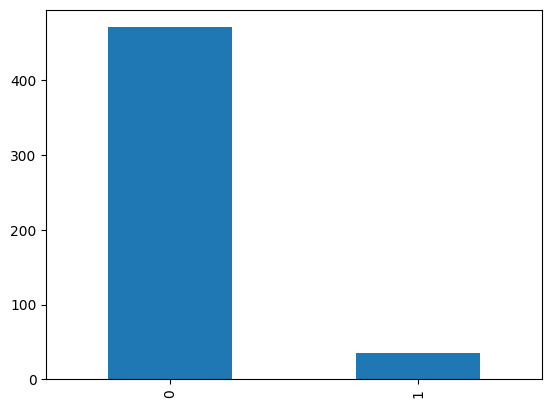

In [146]:
df['CHAS'].value_counts().plot(kind='bar')

Let's pull back to the dataset as a whole for a moment. Two major things that you will look for in almost any dataset are trends and relationships. A typical relationship between variables to explore is the Pearson correlation, or the extent to which two variables are linearly related. The `corr` method will show this in table format for all the columns in a `DataFrame`:

In [ ]:
df.corr(method='pearson')

Suppose you wanted to look at the correlations between all the columns and only one variable. Let's examine the correlation between all other variables and the percentage of owner-occupied houses built before 1940 (AGE). You will do this by accessing the column by index number:

In [ ]:
corr = df.corr(method='pearson')
corr_with_homevalue = corr.iloc[-1]
corr_with_homevalue[corr_with_homevalue.argsort()[::-1]]

With the correlations arranged in descending order, it's easy to see some patterns. Correlating AGE with a variable you created from AGE is a trivial correlation. However, it is interesting to note that the percentage of older housing stock in communities strongly correlates with air pollution (NOX) and the proportion of non-retail business acres per town (INDUS); at least in 1978 metro Boston, older towns are more industrial.

Graphically, you can see the correlations using a heatmap from the Seaborn library:

In [ ]:
import seaborn as sns
sns.heatmap(df.corr(),cmap=sns.cubehelix_palette(20, light=0.95, dark=0.15))

Histograms are another valuable tool for investigating your data. For example, what is the overall distribution of prices of owner-occupied houses in the Boston area?

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['MEDV'])

The default bin size for the matplotlib histogram (essentially, big of buckets of percentages that you include in each histogram bar) is large and might mask smaller details. To get a finer-grained view of the AGE column, you can manually increase the number of bins in the histogram:

In [ ]:
plt.hist(df['MEDV'],bins=50)

Seaborn has a somewhat more attractive version of the standard matplotlib histogram: the distribution plot. This is a combination histogram and kernel density estimate (KDE) plot (essentially, a smoothed histogram):

In [ ]:
sns.distplot(df['MEDV'])

Another commonly-used plot is the Seaborn jointplot, which combines histograms for two columns along with a scatterplot:

In [ ]:
sns.jointplot(df['RM'], df['MEDV'], kind='scatter')

Unfortunately, many of the dots print over each other. You can address this by adding some alpha blending, a figure that sets the transparency for the dots so that concentrations of them drawing over one another will be apparent:

In [ ]:
sns.jointplot(df['RM'], df['MEDV'], kind='scatter', alpha=0.3)

Another way to see patterns in your data is with a two-dimensional KDE plot. Darker colors here represent a higher concentration of data points:

In [ ]:
sns.kdeplot(df['RM'], df['MEDV'], shade=True)

Note that while the KDE plot is very good at showing concentrations of data points, finer structures like linear relationships (such as the clear relationship between the number of rooms in homes and the house's price) are lost in the KDE plot.

Finally, the pairplot in Seaborn allows you to see scatterplots and histograms for several columns in one table. Below, some of the keywords have been altered to produce a more sophisticated and easier to read pairplot that incorporates both alpha blending and linear regression lines for the scatterplots.

In [ ]:
sns.pairplot(df[['RM', 'AGE', 'LSTAT', 'DIS', 'MEDV']], kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

Visualization is the start of the really cool, fun part of data science. So play around with these visualization tools and see what you can learn from the data!

> **Takeaway:** An old joke goes, “What do data scientists see when they look at a dataset? A bunch of numbers.” There is more than a little truth in that joke. Visualization is often the key to finding patterns and correlations in your data. While visualization cannot deliver precise results, it can point you in the right direction to ask better questions and efficiently find value in the data.